In [1]:
%matplotlib inline
from graph import *
from kernel import *
import traceback
from svm import SVM
import seaborn as sns
import matplotlib.pyplot as plt
db = Database()

In [2]:
#db_lab, db_nolab = db.gen_database_test(10, 10, 3, 4)
ker=Kernel(0.05,k=100)
#db.loaded = True
#db.export_db(db_nolab,"no_sing.dat")
db_nolab = db.import_db("no_sing.dat")


In [20]:
%%time
s = SVM(db_lab, 0.7, 0.9, kernel="inv_kernel")
s.learn()
s2 = SVM(db_nolab, 0.7, 0.9, kernel="inv_kernel")
s2.learn()
print("Lab score",s.cross_val_score(3)," & nolab score",s2.cross_val_score(3))

AttributeError: 'list' object has no attribute 'shape'

In [3]:
raw = ker.build_gram_matrix(db_nolab[:,0],kernel=ker.raw_kernel)
inv = ker.build_gram_matrix(db_nolab[:,0],kernel=ker.inv_kernel)
syl = ker.build_gram_matrix(db_nolab[:,0],kernel=ker.sylv_eq_kernel)
con = ker.build_gram_matrix(db_nolab[:,0],kernel=ker.conj_grad_kernel)
fix = ker.build_gram_matrix(db_nolab[:,0],kernel=ker.fixed_point_kernel)
spe = ker.build_gram_matrix(db_nolab[:,0],kernel=ker.spec_decomp_kernel)

In [9]:
diff1 = ker.scale_and_compare(raw,inv)
diff2 = ker.scale_and_compare(raw,syl)
diff3 = ker.scale_and_compare(raw,con)
diff4 = ker.scale_and_compare(raw,fix)
diff5 = ker.scale_and_compare(raw,spe)

diff6 = ker.scale_and_compare(inv,syl)
diff7 = ker.scale_and_compare(inv,con)
diff8 = ker.scale_and_compare(inv,fix)
diff9 = ker.scale_and_compare(inv,spe)

diff10 = ker.scale_and_compare(syl,con)
diff11 = ker.scale_and_compare(syl,fix)
diff12 = ker.scale_and_compare(syl,spe)

diff13 = ker.scale_and_compare(con,fix)
diff14 = ker.scale_and_compare(con,spe)

diff15 = ker.scale_and_compare(fix,spe)
print(diff1,diff2,diff3,diff4,diff5)
print(diff6,diff7,diff8,diff9)
print(diff10,diff11,diff12)
print(diff13,diff14)
print(diff15)

0.00011041859479691838 9.842266139179035e-05 0.00011331379270993258 0.00010783511286298986 0.00010618517472346058
2.1470024763384834e-05 9.095436489033479e-06 4.051150613042402e-06 6.854989986726549e-06
2.884160440597696e-05 1.7445993172194476e-05 1.4616800048608667e-05
1.2351367360537305e-05 1.4868297238698406e-05
2.847454884829041e-06


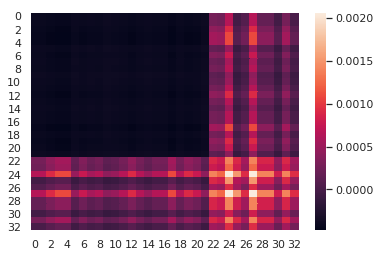

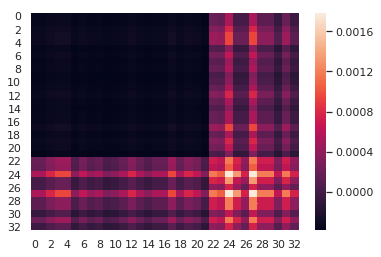

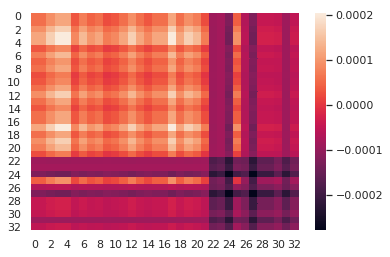

In [23]:
plt.clf()
sns.heatmap(spe-con)
plt.figure()
sns.heatmap(fix-con)
plt.figure()
sns.heatmap(fix-spe)

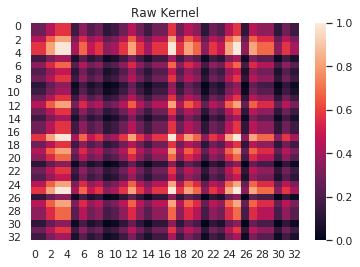

In [24]:
plt.clf()
plt.title("Raw Kernel")
sns.heatmap(raw)

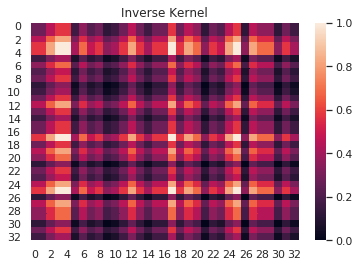

In [4]:
plt.clf()
plt.title("Inverse Kernel")
sns.heatmap(inv)

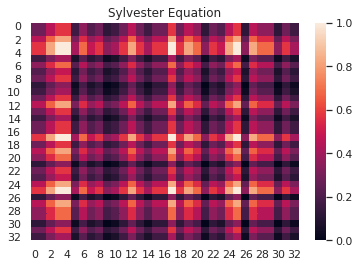

In [5]:
plt.clf()
plt.title("Sylvester Equation")
sns.heatmap(syl)

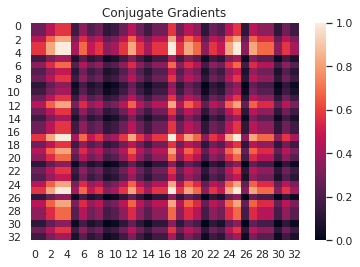

In [27]:
plt.clf()
plt.title("Conjugate Gradients")
sns.heatmap(con)

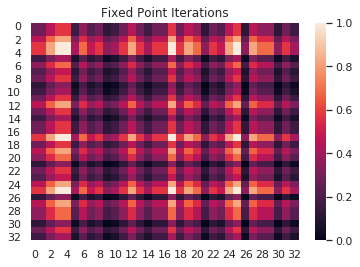

In [28]:
plt.clf()
plt.title("Fixed Point Iterations")
sns.heatmap(fix)

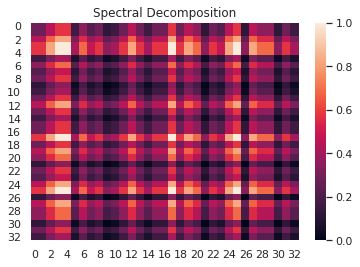

In [29]:
plt.clf()
plt.title("Spectral Decomposition")
sns.heatmap(spe)

In [ ]:
%%time
db = Database()
d = []
N = 30
for _ in range(N):
    db2 = db.gen_database_test(9, 5, 5, 3)
    s = SVM(db2, 0.7, 0.9, kernel="inv_kernel")
    d.append(s.cross_val_score(5))
print("Mean acc = ",sum([x["accuracy"] for x in d])/N)
print("Mean time = ",sum([x["time"] for x in d])/N)
print("Mean std = ",sum([x["stddev"] for x in d])/N)
#rajouter labels
# somme de k = Wx.shape ou 10xWx.shape ne change rien
#normalisé bcp plus rapide (pas toujour)
# certains ont un meilleur score avec d'autres que eux mêmes 
#affichage des graphes et dérouler l'algo à la main pour les carrés noir
#faire avec labels 2~5 et essayer d'avoir des distributions de labels pas trop différentes entre les toplogies

In [ ]:
dbA.shape

## All graphs
Star

In [ ]:
G = db.gen_graph("star",5,3)
pos=nx.spring_layout(G)
nx.draw(G,pos)
plt.figure()
nx.draw(G,pos)
nx.draw_networkx_edge_labels(G,pos,edge_labels={(u,v):e["label"] for (u,v,e) in G.edges(data=True)})

G2=db.alter_graph_struct(G,"star",2)
plt.figure()
pos=nx.spring_layout(G2)
nx.draw(G2,pos)
nx.draw_networkx_edge_labels(G2,pos,edge_labels={(u,v):e["label"] for (u,v,e) in G2.edges(data=True)})

G3=db.alter_graph_labels(G,2)
print(G3)
plt.figure()
pos=nx.spring_layout(G3)
nx.draw(G3,pos)
nx.draw_networkx_edge_labels(G3,pos,edge_labels={(u,v):e["label"] for (u,v,e) in G3.edges(data=True)})

Ring

In [ ]:
G = db.gen_graph("ring",5,3)
pos=nx.spring_layout(G)
nx.draw(G,pos)
plt.figure()
nx.draw(G,pos)
nx.draw_networkx_edge_labels(G,pos,edge_labels={(u,v):e["label"] for (u,v,e) in G.edges(data=True)})

G2=db.alter_graph_struct(G,"ring",2)
plt.figure()
pos=nx.spring_layout(G2)
nx.draw(G2,pos)
nx.draw_networkx_edge_labels(G2,pos,edge_labels={(u,v):e["label"] for (u,v,e) in G2.edges(data=True)})

G3=db.alter_graph_labels(G,2)
print(G3)
plt.figure()
pos=nx.spring_layout(G3)
nx.draw(G3,pos)
nx.draw_networkx_edge_labels(G3,pos,edge_labels={(u,v):e["label"] for (u,v,e) in G3.edges(data=True)})

Tree

In [ ]:
G = db.gen_graph("tree",9,3)
pos=nx.spring_layout(G)
nx.draw(G,pos)
plt.figure()
nx.draw(G,pos)
nx.draw_networkx_edge_labels(G,pos,edge_labels={(u,v):e["label"] for (u,v,e) in G.edges(data=True)})

G2=db.alter_graph_struct(G,"tree",2)
plt.figure()
pos=nx.spring_layout(G2)
nx.draw(G2,pos)
nx.draw_networkx_edge_labels(G2,pos,edge_labels={(u,v):e["label"] for (u,v,e) in G2.edges(data=True)})

G3=db.alter_graph_labels(G,2)
print(G3)
plt.figure()
pos=nx.spring_layout(G3)
nx.draw(G3,pos)
nx.draw_networkx_edge_labels(G3,pos,edge_labels={(u,v):e["label"] for (u,v,e) in G3.edges(data=True)})

# Product graph

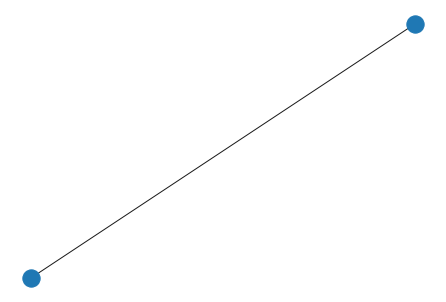

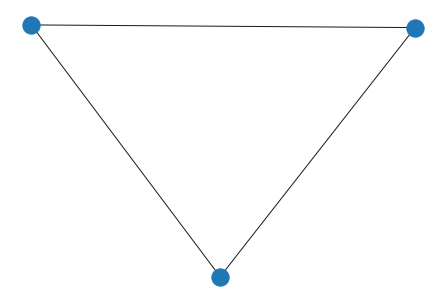

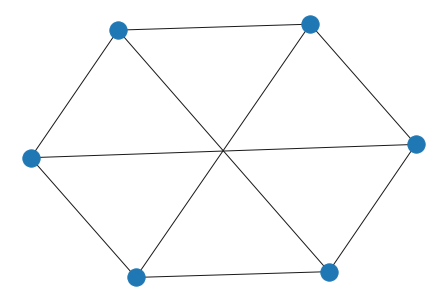

In [43]:
G = db.gen_graph("star",1,1)
G2 = db.gen_graph("ring",3,1)
nx.draw(G)
plt.figure()
nx.draw(G2)
W,_ = db.product_graph(G,G2)
plt.figure()
nx.draw(W)

# Points fixes : faire varier lambda et montrer différence temps de convergence & verifier si lambda plus haut donne de meilleur accuracy

In [33]:
xs = []
scores = []
times = []
N = 50
for x in range(1,N):
    if(x%(N/10)==0):
        print(100*x/N,"%")
    try :
        s = SVM(db=db_nolab, ratio_split=0.7, lbd=x/N, kernel="fixed_point_kernel")
        dic = s.cross_val_score(k=3)
        scores.append(dic["accuracy"]*100)
        var.append(dic["stddev"])
        xs.append(x)
        times.append(dic["time"])
    except Exception as e:
        print(e)
        break

10.0 %
20.0 %
30.0 %
40.0 %
50.0 %
60.0 %
70.0 %
80.0 %
90.0 %


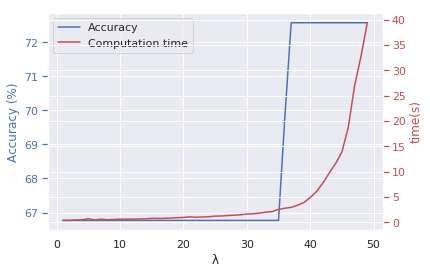

In [34]:
fig, ax1 = plt.subplots()
l1, = ax1.plot(xs, scores, label="Accuracy", color="b")
ax1.set_xlabel('λ')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Accuracy (%)', color="b")
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
l2, = ax2.plot(xs,times,label="Computation time", color='r')
ax2.set_ylabel('time(s)', color='r')
ax2.tick_params('y', colors='r')
lines = [l1,l2]
ax1.legend(lines, [l.get_label() for l in lines])

# nb iter conj grad

In [9]:
xs = []
scores = []
times = []
var = []
N = 50
for x in range(1,N,5):
    if(x%(N/10)==0):
        print(100*x/N,"%")
    try :
        #moyenne
        t = 0
        for _ in range(40):
            s = SVM(db=db_nolab, ratio_split=0.7, lbd=0.5, kernel="conj_grad_kernel", k=x)
            dic = s.cross_val_score(k=3)
            t+= dic["time"]
        t /= 3
        scores.append(dic["accuracy"]*100)
        var.append(dic["stddev"])
        xs.append(x)
        times.append(t)
    except Exception as e:
        print(e)
        traceback.print_exc()
        break

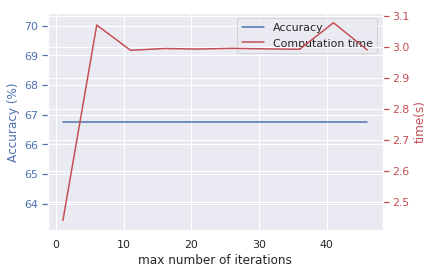

In [10]:
fig, ax1 = plt.subplots()
l1, = ax1.plot(xs, scores, label="Accuracy", color="b")
ax1.set_xlabel('max number of iterations')
ax1.set_ylabel('Accuracy (%)', color="b")
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
l2, = ax2.plot(xs,times,label="Computation time", color='r')
ax2.set_ylabel('time(s)', color='r')
ax2.tick_params('y', colors='r')
lines = [l1,l2]
ax1.legend(lines, [l.get_label() for l in lines])

# Computation time and accuracy for different kernels VARIATION ON LAMBDA

In [3]:
xs = []
t_raw = []
t_inv = []
t_syl = []
t_fix = []
t_conj = []
t_spec = []
a_raw = []
a_inv = []
a_syl = []
a_fix = []
a_conj = []
a_spec = []
N = 10
for x in range(1,N):
    xs.append(x/N)
    #raw
    s = SVM(db=db_nolab, ratio_split=0.7, lbd=x/N, kernel="raw_kernel")
    dic=s.cross_val_score(3)
    t_raw.append(dic["time"])
    a_raw.append(dic["accuracy"])
    #inv
    s = SVM(db=db_nolab, ratio_split=0.7, lbd=x/N, kernel="inv_kernel")
    dic=s.cross_val_score(3)
    t_inv.append(dic["time"])
    a_inv.append(dic["accuracy"])
    #syl
    s = SVM(db=db_nolab, ratio_split=0.7, lbd=x/N, kernel="sylv_eq_kernel")
    dic=s.cross_val_score(3)
    t_syl.append(dic["time"])
    a_syl.append(dic["accuracy"])
    #conj
    s = SVM(db=db_nolab, ratio_split=0.7, lbd=x/N, kernel="conj_grad_kernel")
    dic=s.cross_val_score(3)
    t_conj.append(dic["time"])
    a_conj.append(dic["accuracy"])
    #spec
    s = SVM(db=db_nolab, ratio_split=0.7, lbd=x/N, kernel="spec_decomp_kernel")
    dic=s.cross_val_score(3)
    t_spec.append(dic["time"])
    a_spec.append(dic["accuracy"])
    s = SVM(db=db_nolab, ratio_split=0.7, lbd=x/N, kernel="fixed_point_kernel")
    dic=s.cross_val_score(3)
    t_fix.append(dic["time"])
    a_fix.append(dic["accuracy"])

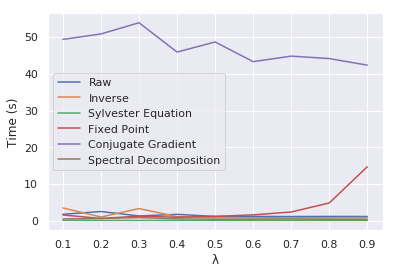

In [10]:
plt.figure()
plt.plot(xs,t_raw,label="Raw")
plt.plot(xs,t_inv,label="Inverse")
plt.plot(xs,t_syl,label="Sylvester Equation")
plt.plot(xs,t_fix,label="Fixed Point")
plt.plot(xs,t_conj,label="Conjugate Gradient")
plt.plot(xs,t_spec,label="Spectral Decomposition")
plt.xlabel('λ')
plt.ylabel('Time (s)')
plt.legend()

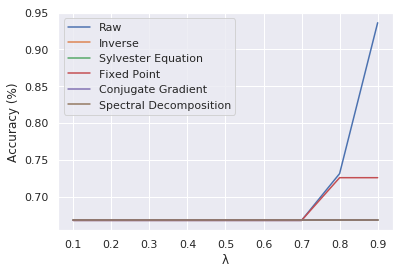

In [11]:
plt.figure()
plt.plot(xs,a_raw,label="Raw")
plt.plot(xs,a_inv,label="Inverse")
plt.plot(xs,a_syl,label="Sylvester Equation")
plt.plot(xs,a_fix,label="Fixed Point")
plt.plot(xs,a_conj,label="Conjugate Gradient")
plt.plot(xs,a_spec,label="Spectral Decomposition")
plt.xlabel('λ')
plt.ylabel('Accuracy (%)')
plt.tick_params('y')
plt.legend()

# Computation time for different kernels VARIATION ON NB OF GRAPHS

In [36]:
xs = []
t_raw = []
t_inv = []
t_syl = []
t_fix = []
t_conj = []
t_spec = []
a_raw = []
a_inv = []
a_syl = []
a_fix = []
a_conj = []
a_spec = []
N = 20
np.random.seed(23)
for x in range(1,N):
    db_lab, db_nolab = db.gen_database_test(5*x, 10, 3, 4)
    print("_____",15*x+3," graphs_____________")
    xs.append(15*x)
    #raw
    s = SVM(db=db_nolab, ratio_split=0.7, lbd=0.05, kernel="raw_kernel")
    dic=s.cross_val_score(3)
    t_raw.append(dic["time"])
    a_raw.append(dic["accuracy"]*100)
    #inv
    s = SVM(db=db_nolab, ratio_split=0.7, lbd=0.05, kernel="inv_kernel")
    dic=s.cross_val_score(3)
    t_inv.append(dic["time"])
    a_inv.append(dic["accuracy"]*100)
    #syl
    s = SVM(db=db_nolab, ratio_split=0.7, lbd=0.05, kernel="sylv_eq_kernel")
    dic=s.cross_val_score(3)
    t_syl.append(dic["time"])
    a_syl.append(dic["accuracy"]*100)
    #conj
    s = SVM(db=db_nolab, ratio_split=0.7, lbd=0.05, kernel="conj_grad_kernel",k=100)
    dic=s.cross_val_score(3)
    t_conj.append(dic["time"])
    a_conj.append(dic["accuracy"]*100)
    #spec
    s = SVM(db=db_nolab, ratio_split=0.7, lbd=0.05, kernel="spec_decomp_kernel")
    dic=s.cross_val_score(3)
    t_spec.append(dic["time"])
    a_spec.append(dic["accuracy"]*100)
    s = SVM(db=db_nolab, ratio_split=0.7, lbd=0.05, kernel="fixed_point_kernel")
    dic=s.cross_val_score(3)
    t_fix.append(dic["time"])
    a_fix.append(dic["accuracy"]*100)

_____ 18  graphs_____________
_____ 33  graphs_____________
_____ 48  graphs_____________
_____ 63  graphs_____________
_____ 78  graphs_____________
_____ 93  graphs_____________
_____ 108  graphs_____________
_____ 123  graphs_____________
_____ 138  graphs_____________
_____ 153  graphs_____________
_____ 168  graphs_____________
_____ 183  graphs_____________
_____ 198  graphs_____________
_____ 213  graphs_____________
_____ 228  graphs_____________
_____ 243  graphs_____________
_____ 258  graphs_____________
_____ 273  graphs_____________
_____ 288  graphs_____________


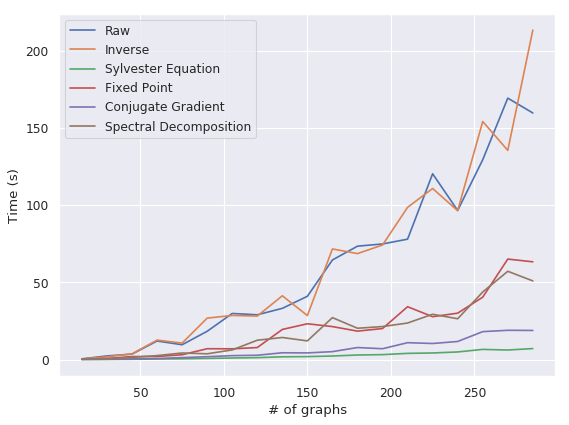

In [37]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(xs,t_raw,label="Raw")
plt.plot(xs,t_inv,label="Inverse")
plt.plot(xs,t_syl,label="Sylvester Equation")
plt.plot(xs,t_fix,label="Fixed Point")
plt.plot(xs,t_conj,label="Conjugate Gradient")
plt.plot(xs,t_spec,label="Spectral Decomposition")
plt.xlabel('# of graphs')
plt.ylabel('Time (s)')
plt.legend()

[44.44444444444444, 56.481481481481474, 54.44444444444444, 41.269841269841265, 48.61111111111111, 41.81818181818182, 44.44444444444444, 47.008547008547005, 56.20370370370371, 48.36601307189542, 46.653671215074716, 50.291005291005284, 46.46464646464647, 48.752012882447666, 54.42735042735043, 46.090534979423865, 50.04105090311987, 52.78375149342891, 56.59722222222222]


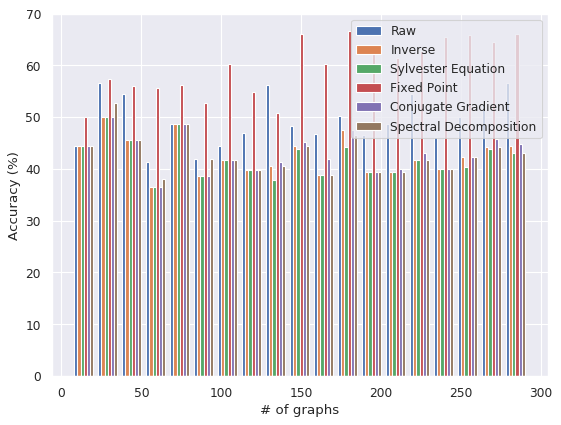

In [38]:
print(a_raw)
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
width=2
plt.bar(np.array(xs)-3*width,a_raw,label="Raw",width=width)
plt.bar(np.array(xs)-2*width,a_inv,label="Inverse",width=width)
plt.bar(np.array(xs)-1*width,a_syl,label="Sylvester Equation",width=width)
plt.bar(np.array(xs),a_fix,label="Fixed Point",width=width)
plt.bar(np.array(xs)+1*width,a_conj,label="Conjugate Gradient",width=width)
plt.bar(np.array(xs)+2*width,a_spec,label="Spectral Decomposition",width=width)
plt.xlabel('# of graphs')
plt.ylabel('Accuracy (%)')
plt.tick_params('y')
plt.legend()

# same on nodes

# label vs no label

In [ ]:
xs = []
t_lab = []
t_nolab = []
a_lab = []
a_nolab = []
N = 3
for x in range(1,N):
    db_lab, db_nolab = db.gen_database_test(5*x, 10, 3, 4)
    xs.append(5*x)
    #inv
    s = SVM(db=db_nolab, ratio_split=0.7, lbd=0.05, kernel="inv_kernel")
    dic=s.cross_val_score(3)
    t_nolab.append(dic["time"])
    a_nolab.append(dic["accuracy"])
    #inv
    s = SVM(db=db_lab, ratio_split=0.7, lbd=0.05, kernel="inv_kernel")
    dic=s.cross_val_score(3)
    t_lab.append(dic["time"])
    a_lab.append(dic["accuracy"])